In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import numpy as np

In [17]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [18]:
df.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [19]:
df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

Text(0.5, 1.0, 'Bi·ªÉu ƒë·ªì d·ªØ li·ªáu thi·∫øu ban ƒë·∫ßu')

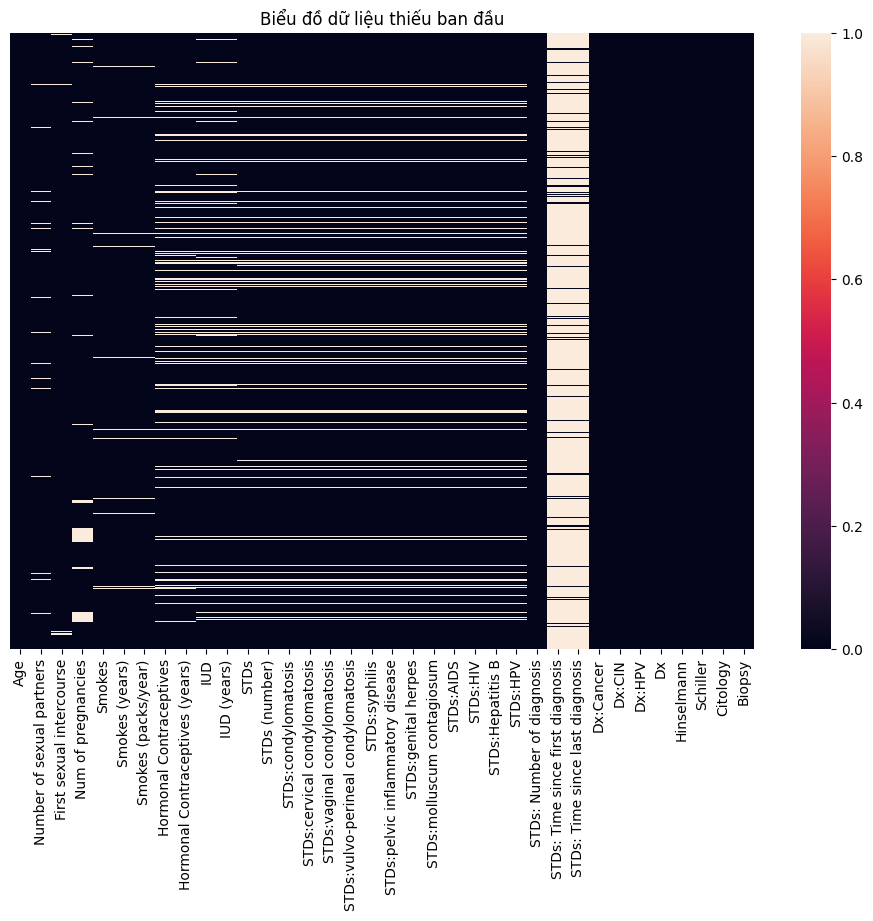

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load l·∫°i d·ªØ li·ªáu g·ªëc
df_raw = pd.read_csv("risk_factors_cervical_cancer.csv")  # ho·∫∑c t√™n file g·ªëc c·ªßa b·∫°n

# Thay th·∫ø d·∫•u '?' th√†nh NaN n·∫øu c√≥
df_raw.replace('?', pd.NA, inplace=True)

# V·∫Ω heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.isnull(), yticklabels=False)
plt.title("Bi·ªÉu ƒë·ªì d·ªØ li·ªáu thi·∫øu ban ƒë·∫ßu")



In [21]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df.fillna(df.mean(), inplace = True)

<Axes: >

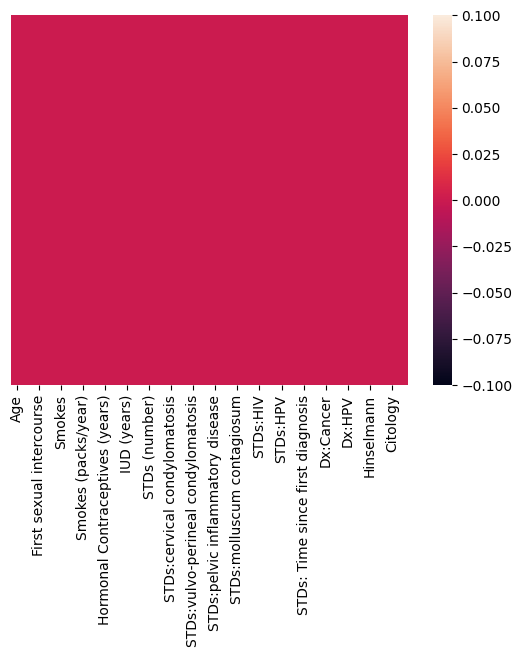

In [22]:
sns.heatmap(df.isnull(), yticklabels = False)

In [23]:
X =df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [24]:
df.head()

Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                   15.0000   
1   15                        1.0                   14.0000   
2   34                        1.0                   16.9953   
3   52                        5.0                   16.0000   
4   46                        3.0                   21.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   

   STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                          6.140845                         5.816901   
1                          6.140845                         5.816901   
2                          6.140845                         5.816901   
3                          6.140845                         5.816901   
4                          6.140845                         5.816901   

   Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
0          0       0       0   0           0         0         0       0  
1          0       0       0   0           0         0         0       0  
2          0       0       0   0           0         0         0       0  
3          1       0       1   0           0         0         0       0  
4          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

In [25]:
df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.642267                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.399325    0.350189        4.057885             2.209657   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               858.000000                       858.000000  858.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.448671                         3.519082    0.293260   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         1.000000    0.000000   
75%                   1.000000                         2.256419    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...  STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count  ...                        858.000000                       858.000000   
mean   ...                          6.140845                         5.816901   
std    ...                          1.684784                         1.644843   
min    ...                          1.000000                         1.000000   
25%    ...                          6.140845                         5.816901   
50%    ...                          6.140845                         5.816901   
75%    ...                          6.140845                         5.816901   
max    ...                         22.000000                        22.000000   

        Dx:Cancer      Dx:CIN      Dx:HPV          Dx  Hinselmann    Schiller  \
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000   
mean     0.020979    0.010490    0.020979    0.027972    0.040793    0.086247   
std      0.143398    0.101939    0.143398    0.164989    0.197925    0.280892   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Citology      Biopsy  
count  858.000000  858.000000  
mean     0.051282    0.064103  
std      0.220701    0.245078  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      1.000000    1.000000  

[8 rows x 36 columns]

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify=y)

In [27]:
def evaluate_model(model, X, y, k=10):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))

    print("=== Evaluation Results ===")
    print(f"Accuracy :  {np.mean(accuracy_scores):.4f} ¬± {np.std(accuracy_scores):.4f}")
    print(f"F1-score :  {np.mean(f1_scores):.4f} ¬± {np.std(f1_scores):.4f}")
    print(f"Precision:  {np.mean(precision_scores):.4f} ¬± {np.std(precision_scores):.4f}")
    print(f"Recall   :  {np.mean(recall_scores):.4f} ¬± {np.std(recall_scores):.4f}")
    

1.  Accuracy (ƒê·ªô ch√≠nh x√°c t·ªïng th·ªÉ)
    Accuracy l√† t·ª∑ l·ªá s·ªë m·∫´u m√† m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng tr√™n t·ªïng s·ªë m·∫´u.
üìé V√≠ d·ª•: n·∫øu c√≥ 100 ng∆∞·ªùi, m√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng 90 ng∆∞·ªùi ‚Üí Accuracy = 90%.

2. Precision (ƒê·ªô ch√≠nh x√°c c·ªßa d·ª± ƒëo√°n d∆∞∆°ng t√≠nh)
    Precision ƒëo l∆∞·ªùng xem trong c√°c l·∫ßn m√¥ h√¨nh d·ª± ƒëo√°n l√† ‚Äúc√≥ b·ªánh‚Äù, th√¨ bao nhi√™u ph·∫ßn trƒÉm l√† ƒë√∫ng.
üß† V√≠ d·ª•: N·∫øu m√¥ h√¨nh n√≥i 10 ng∆∞·ªùi ‚Äúc√≥ b·ªánh‚Äù m√† ch·ªâ 6 ng∆∞·ªùi th·∫≠t s·ª± m·∫Øc b·ªánh ‚Üí Precision = 0.6.

3. Recall (ƒê·ªô bao ph·ªß ca th·∫≠t s·ª± d∆∞∆°ng t√≠nh)
Recall ƒëo l∆∞·ªùng xem m√¥ h√¨nh b·∫Øt ƒë∆∞·ª£c bao nhi√™u ph·∫ßn trƒÉm s·ªë ca th·∫≠t s·ª± m·∫Øc b·ªánh.
üß† V√≠ d·ª•: C√≥ 10 ng∆∞·ªùi th·∫≠t s·ª± m·∫Øc b·ªánh, m√¥ h√¨nh ch·ªâ b·∫Øt ƒë∆∞·ª£c 6 ng∆∞·ªùi ‚Üí Recall = 0.6.
 
4. F1-score (ƒêi·ªÉm c√¢n b·∫±ng gi·ªØa Precision v√† Recall)
 F1-score l√† trung b√¨nh ƒëi·ªÅu h√≤a c·ªßa Precision v√† Recall.
N√≥ c√¢n b·∫±ng gi·ªØa vi·ªác d·ª± ƒëo√°n ƒë√∫ng ca b·ªánh v√† kh√¥ng b·ªè s√≥t ca b·ªánh.
üß† N·∫øu Precision = 1 v√† Recall = 0, th√¨ F1 = 0 (nghƒ©a l√† m·∫•t c√¢n b·∫±ng ‚Üí kh√¥ng t·ªët).

=== Evaluation Results ===
Accuracy :  0.9510 ¬± 0.0214
F1-score :  0.5961 ¬± 0.1064
Precision:  0.6856 ¬± 0.2247
Recall   :  0.5994 ¬± 0.1823


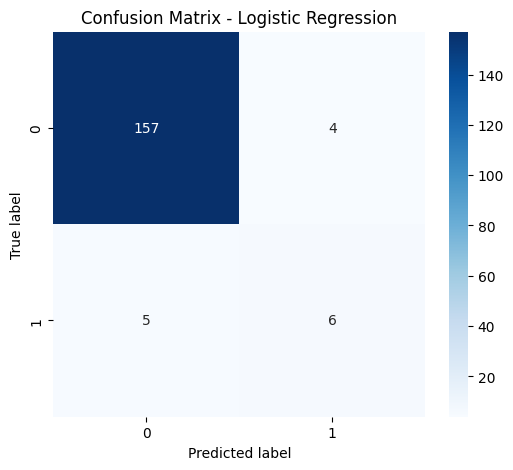

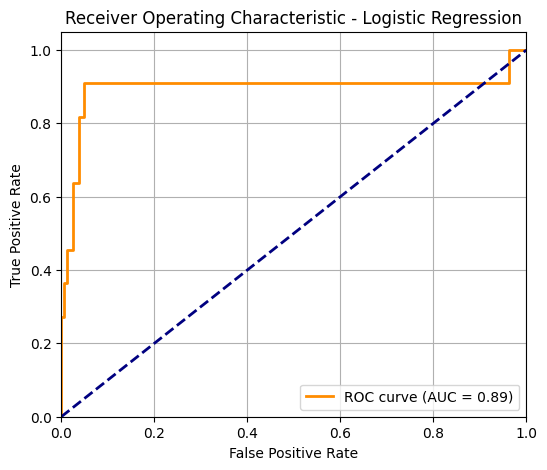

['logistic_model.pkl']

In [ ]:
#Logistic regression model


# 1. ƒê√°nh gi√° m√¥ h√¨nh v·ªõi KFold
model = LogisticRegression(max_iter=1000)
evaluate_model(model, X, y)

# 2. Chia d·ªØ li·ªáu ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v√† d·ª± ƒëo√°n
model.fit(X_train_cm, y_train_cm)
y_pred_cm = model.predict(X_test_cm)

# 4. V·∫Ω Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

import joblib
from sklearn.metrics import roc_curve, auc

# 5. T√≠nh x√°c su·∫•t d·ª± ƒëo√°n (predict_proba) ƒë·ªÉ v·∫Ω ROC
y_proba = model.predict_proba(X_test_cm)[:, 1]

# 6. T√≠nh c√°c gi√° tr·ªã cho ROC curve
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(imputer, "imputer.pkl")


| Metric    | Mean   | Std.Dev (¬±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8333 | ¬± 0.1972    |
| F1-score  | 0.1667 | ¬± 0.3416    |
| Precision | 0.2000 | ¬± 0.4000    |
| Recall    | 0.1500 | ¬± 0.3202    |



M√¥ h√¨nh Logistic Regression c√≥ ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ t∆∞∆°ng ƒë·ªëi ·ªïn.

Tuy nhi√™n, kh·∫£ nƒÉng ph√°t hi·ªán ca d∆∞∆°ng t√≠nh (Recall) v√† c√¢n b·∫±ng Precision/Recall (F1-score) v·∫´n c√≤n r·∫•t th·∫•p.

ƒêi·ªÅu n√†y cho th·∫•y Logistic Regression ch∆∞a ph√π h·ª£p v·ªõi b√†i to√°n d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng nh∆∞ hi·ªán t·∫°i.



=== Evaluation Results ===
Accuracy :  0.9487 ¬± 0.0234
F1-score :  0.5161 ¬± 0.2247
Precision:  0.5867 ¬± 0.2603
Recall   :  0.5001 ¬± 0.2643


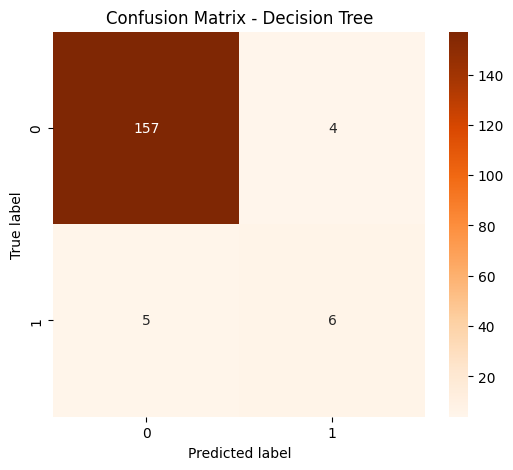

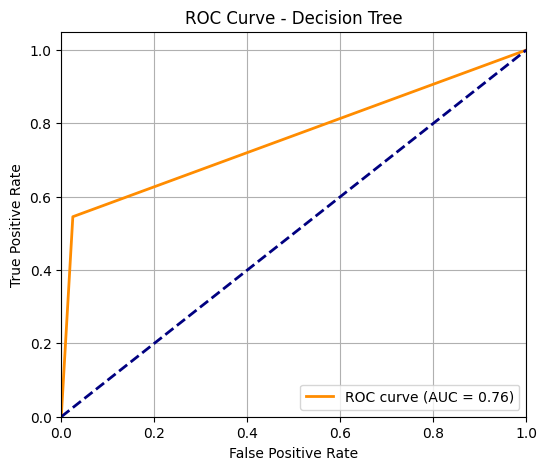

In [29]:
# Descision tree model
tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(tree_model, X, y)

# 2. Chia t·∫≠p d·ªØ li·ªáu ƒë·ªÉ tr·ª±c quan
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=0.2,stratify= y,  random_state=42)

# 3. Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v√† d·ª± ƒëo√°n
tree_model.fit(X_train_cm, y_train_cm)
y_pred_cm = tree_model.predict(X_test_cm)

# 4. V·∫Ω Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



# 5. L·∫•y x√°c su·∫•t d·ª± ƒëo√°n t·ª´ m√¥ h√¨nh (c·ªôt th·ª© 2 t∆∞∆°ng ·ª©ng class = 1)
y_proba = tree_model.predict_proba(X_test_cm)[:, 1]

# 6. T√≠nh ROC v√† AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


| Metric    | Mean   | Std.Dev (¬±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.9167 | ¬± 0.1118    |
| F1-score  | 0.5167 | ¬± 0.4500    |
| Precision | 0.5000 | ¬± 0.4472    |
| Recall    | 0.5500 | ¬± 0.4717    |



M√¥ h√¨nh Decision Tree cho k·∫øt qu·∫£ t·ªët tr√™n nhi·ªÅu m·∫∑t, ƒë·∫∑c bi·ªát l√† kh·∫£ nƒÉng ph√°t hi·ªán ca m·∫Øc b·ªánh (Recall).

F1-score cao c≈©ng cho th·∫•y m√¥ h√¨nh c√¢n b·∫±ng t·ªët gi·ªØa Precision v√† Recall.

ƒê√¢y l√† l·ª±a ch·ªçn ph√π h·ª£p h∆°n khi ƒë√°nh gi√° m√¥ h√¨nh cho d·ªØ li·ªáu y t·∫ø nh·∫°y c·∫£m.



=== Evaluation Results ===
Accuracy :  0.9487 ¬± 0.0276
F1-score :  0.5368 ¬± 0.2709
Precision:  0.6588 ¬± 0.2921
Recall   :  0.5348 ¬± 0.3477


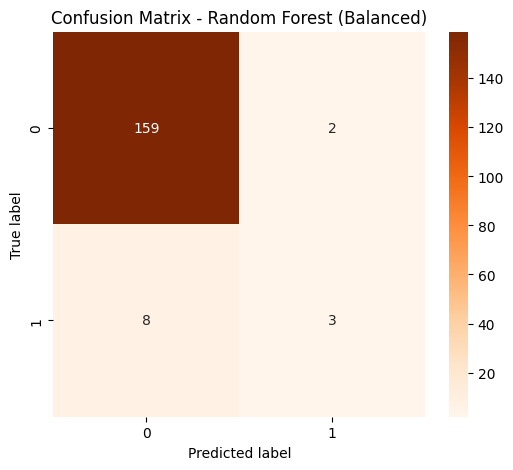

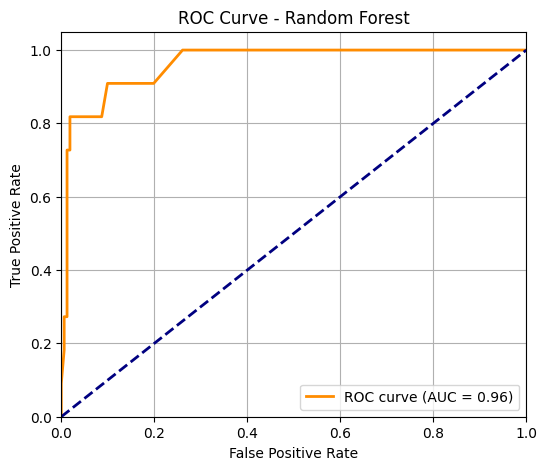

In [30]:
#Random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)

# 2. ƒê√°nh gi√° m√¥ h√¨nh v·ªõi k-fold
evaluate_model(rf_model, X, y)

# 3. Tr·ª±c quan confusion matrix & ROC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Chia d·ªØ li·ªáu ƒë·ªÉ tr·ª±c quan h√≥a
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh
rf_model.fit(X_train_cm, y_train_cm)
y_pred_cm = rf_model.predict(X_test_cm)

# Confusion matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest (Balanced)")
plt.show()

# T√≠nh x√°c su·∫•t d·ª± ƒëo√°n cho class 1
y_proba = rf_model.predict_proba(X_test_cm)[:, 1]

# T√≠nh ROC v√† AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# V·∫Ω ƒë∆∞·ªùng ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


| Metric    | Mean   | Std.Dev (¬±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8633 | ¬± 0.1016    |
| F1-score  | 0.1167 | ¬± 0.2363    |
| Precision | 0.1500 | ¬± 0.3202    |
| Recall    | 0.1000 | ¬± 0.2000    |



M·∫∑c d√π Accuracy ƒë·∫°t m·ª©c kh√° cao (~86%), nh∆∞ng c√°c ch·ªâ s·ªë nh∆∞ F1-score, Precision, v√† ƒë·∫∑c bi·ªát l√† Recall ƒë·ªÅu r·∫•t th·∫•p.

ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh thi√™n l·ªách v·ªÅ l·ªõp √¢m t√≠nh (kh√¥ng b·ªánh) ‚Äî kh·∫£ nƒÉng ph√°t hi·ªán ca b·ªánh c√≤n k√©m.

Kh√¥ng n√™n ch·ªâ d·ª±a v√†o Accuracy ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh trong b√†i to√°n y t·∫ø c√≥ d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng.